####  Covariance  
How much one value varies when the other varies.     

####  Correlation   
Correlation measures the degree of co-movement of two variables. A relative measure.   
$$\frac{covariance}{standard\ deviation\ of\ each\ variable}$$

##### Positive Correlation  
If variable Y increases when variable X increases, then X and Y are positively correlated.         
Fixed Deposit Maturity amount is correlated with the period and rate of interest.       
##### Negative Correlation   
If variable Y decreases when variable X increases, then X and Y are negatively correlated.   
##### No correlation  
When there is no obvious relationship between X and Y, we say X and Y are uncorrelated.   

##### Correlation need not be causation   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

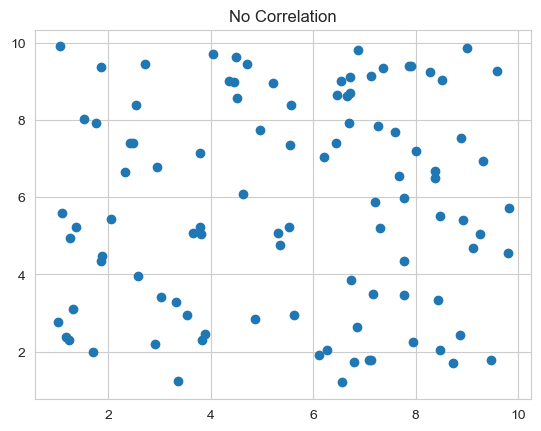

In [3]:
n = 100
X = np.random.uniform(1,10,n)
Y = np.random.uniform(1,10,n)
plt.scatter(X,Y)
plt.title("No Correlation");

#### Correlation Coefficient   

In [5]:
X_std = (X - np.mean(X))/np.std(X)
Y_std = (Y - np.mean(Y))/np.std(Y)

Correlation_Coefficient = np.dot(X_std, Y_std)/n
print(f"{Correlation_Coefficient = }")

Correlation_Coefficient = 0.044496326661537


In [10]:
pd.DataFrame(np.corrcoef(X, Y), index=['X','Y'], columns=['X','Y'])

,X,Y
X,1.000000,0.044496
Y,0.044496,1.000000


#### Covariance Matrix  
The covariance matrix is a very useful matrix in data science and machine learning.  
It provides information about co-movement (correlation) between features in a dataset.  
$$\sigma_{jk} = \frac{1}{n}\sum_{i=1}^{n}(\frac{X_{j}^{(i)}-\mu_{j}}{\sigma_j})(\frac{X_{k}^{(i)}-\mu_{k}}{\sigma_k})$$   
where mu and sigma represent the mean and standard deviation of a given feature.   

Here n is the number of observations in the dataset, and the subscripts j and k take values 1, 2, 3, . . ., m, where m is the number of features in  the dataset.   
E.g., if a dataset has 4 features with 100 observations, then n = 100, and m = 4, hence the covariance matrix will be a 4 x 4 matrix. The diagonal elements will all be 1, as they represent the correlation between a feature and itself, which by definition is equal to one.

In [4]:
df = pd.read_excel('../Data/Six_Schools.xlsx', sheet_name='all_Schools')
df.columns

Index(['School', 'ID', 'Sex', 'Age', 'Home_state', 'Home_town',
       'Mother_tongue', 'Height_cm', 'Weight_Kg', 'BMI', 'Student_ID'],
      dtype='object')

In [5]:
df1  = df[['Height_cm', 'Weight_Kg', 'BMI']]
df1.cov()

,Height_cm,Weight_Kg,BMI
Height_cm,88.769578,70.295914,0.826329
Weight_Kg,70.295914,159.396319,37.843927
BMI,0.826329,37.843927,13.512800


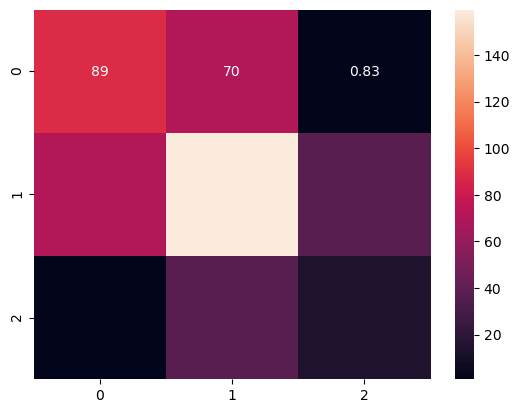

In [5]:
import seaborn as sns
sns.heatmap(df1.cov().values.T.tolist(), annot=True);

### Ordinary Least Squares (OLS)   
A method to estimate unknown parameters in a linear regression model.    
It minimises the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function of the independent variable.  

Geometrically, this is the sum of the squared distances, parallel to the axis of the dependent variable, between each data point in the set and the corresponding point on the regression surface.  
The smaller the differences, the better the model fits the data. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.linear_model import LinearRegression

sns.set_style("whitegrid")

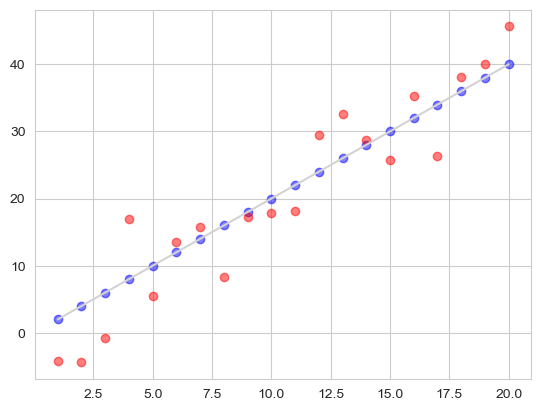

In [7]:
x = np.linspace(1,20,20)
m, c = 2, 0 
y = m * x + c
y1 = [i+ (0.5-random.random())*20 for i in y]

plt.scatter(x,y, color='blue', alpha=0.5)
plt.scatter(x,y1, color='red', alpha=0.5)
plt.plot(x, y, color='lightgrey');

In [10]:
xls = pd.ExcelFile('../Data/Six_Schools.xlsx')
xls.sheet_names

['NCB22',
 'DSC21',
 'PES21',
 'PES22_A',
 'PES22_B',
 'NID20',
 'NID21',
 'KSP21',
 'KSP22',
 'Puma_Indian',
 'all_Schools',
 'RVU22']

In [11]:
df_puma = xls.parse('Puma_Indian')
df_puma.columns

Index(['Height_cm', 'Weight_Kg', 'Age', 'male', 'Sex', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'ht_bin'],
      dtype='object')

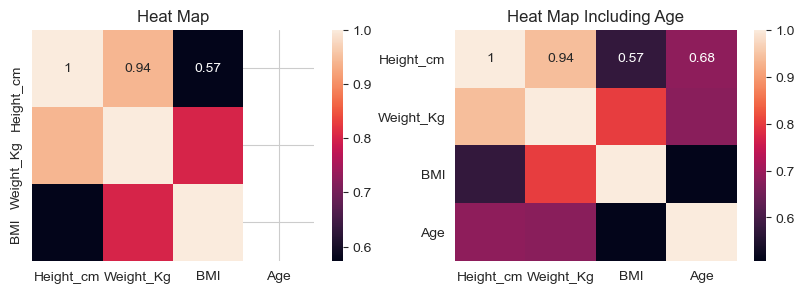

In [12]:
df_puma = xls.parse('Puma_Indian', usecols=['Age','Height_cm','Weight_Kg','male'])
df_puma['BMI'] = df_puma.Weight_Kg/(df_puma.Height_cm/100)**2

df = df_puma[['Height_cm', 'Weight_Kg', 'BMI']]
df1 = df_puma[['Height_cm', 'Weight_Kg', 'BMI', 'Age']]
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,3))
axes[0].set_title('Heat Map');
axes[1].set_title('Heat Map Including Age');
sns.heatmap(df.corr(), annot=True, ax=axes[0]);
sns.heatmap(df1.corr(), annot=True, ax=axes[1]);


# df_puma.head()

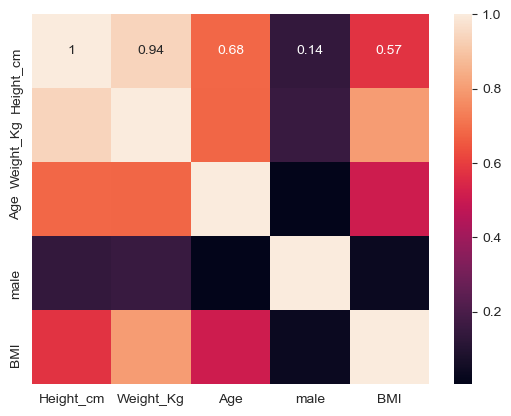

In [13]:
sns.heatmap(df_puma.corr(), annot=True); #, ax=axes[0]);

In [14]:
df.corr()
df1.corr()

,Height_cm,Weight_Kg,BMI,Age
Height_cm,1.000000,0.940822,0.573596,0.683689
Weight_Kg,0.940822,1.000000,0.800904,0.678335
BMI,0.573596,0.800904,1.000000,0.507452
Age,0.683689,0.678335,0.507452,1.000000


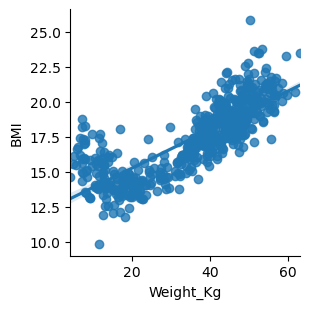

In [17]:
sns.lmplot(x='Weight_Kg', y='BMI', data=df1, height=3);
# sns.lmplot(x='Height_cm', y='BMI', data=df, height=3);

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [23]:
#  reshape creates 2D list, needed for the model  
X = df.Weight_Kg.values.reshape(-1, 1) 
y = df.BMI.values.reshape(-1, 1)       

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [25]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Coefficient of determination of the prediction.  

$$R^2 = 1 - \frac{u}{v}$$
 
where   
$u = \sum(y_{true} - y_{pred})^2$ - the residual sum of squares    
$v = \sum(y_{true} - (y_{true}.mean())^2$ - the total sum of squares    

The best possible score is 1.0   
It can be negative because the model can be arbitrarily worse   
A model that always predicts the expected value of y, disregarding the input features, get a score of 0.0.

In [26]:
regressor.score(X, y)

0.6413481067316935

In [27]:
# Predict BMI 
y_pred = regressor.predict([[64], [65], [50]])
y_pred

array([[21.30566153],
       [21.44414355],
       [19.36691323]])

In [28]:
64/1.74**2
65/1.64**2
50/1.46**2

23.45655845374367

In [29]:
key = random.randint(1,18)
df = pd.DataFrame(df_nmk.iloc[key][['Name','Height_cm','Weight_Kg', 'BMI']]).T
weight = df.Weight_Kg.values[0]
df['Predicted_BMI'] = round(regressor.predict([[weight]])[0][0], 2)
df['Error'] = df.Predicted_BMI - df.BMI
df

NameError: name 'df_nmk' is not defined

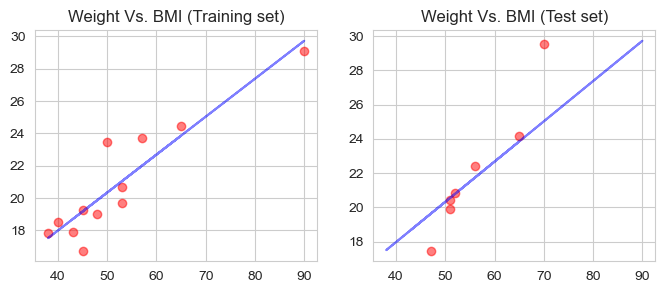

In [35]:
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)

plt.scatter(X_train, y_train, color='red', alpha=0.5)
plt.plot(X_train, regressor.predict(X_train), color='blue', alpha=0.5)
plt.title('Weight Vs. BMI (Training set)')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', alpha=0.5)
plt.plot(X_train, regressor.predict(X_train), color='blue', alpha=0.5)
plt.title('Weight Vs. BMI (Test set)')
plt.show();

---  
---    
#### Task   
Check the correlation between weight and BMI for the data from different schools.   
Will the accuracy of the results change from sample to sample?  
What will be the performance if we train the model using a different dataset?   

In [48]:
# df_puma.head()
df_puma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height_cm  544 non-null    float64
 1   Weight_Kg  544 non-null    float64
 2   Age        544 non-null    float64
 3   male       544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


In [49]:

df = df_puma.copy()
x = df['Height_cm'].to_numpy().reshape(-1, 1)
y = df['Weight_Kg'].to_numpy().reshape(-1, 1)
print(f"{x[:2]}\n{y[:2]}")

[[53.975]
 [55.88 ]]
[[4.252425 ]
 [4.8477645]]


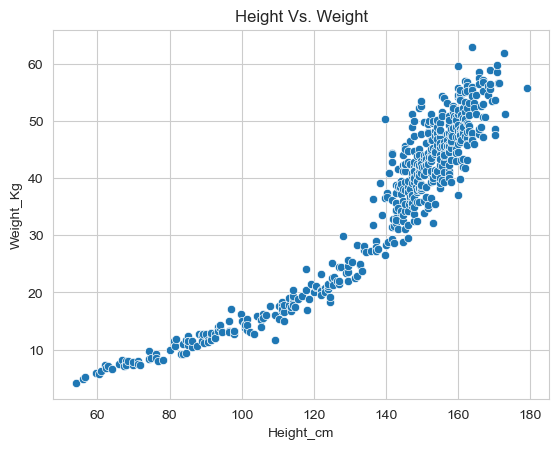

In [5]:
sns.scatterplot(x='Height_cm', y='Weight_Kg', data = df)
plt.title("Height Vs. Weight");


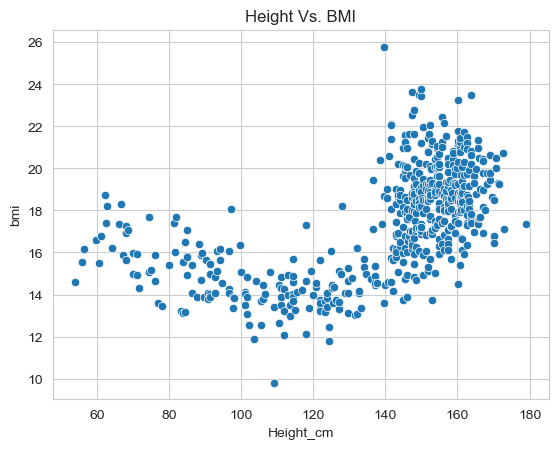

In [6]:
df['bmi'] = df.Weight_Kg/(df.Height_cm/100)**2

sns.scatterplot(x='Height_cm', y='bmi', data = df)
plt.title("Height Vs. BMI");   

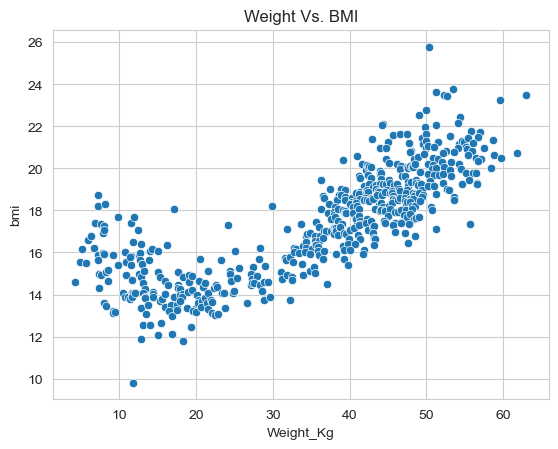

In [7]:
sns.scatterplot(x='Weight_Kg', y='bmi', data = df)
plt.title("Weight Vs. BMI");

In [53]:
df.columns
df['bmi'] = df.Weight_Kg/(df.Height_cm/100)**2

Index(['Height_cm', 'Weight_Kg', 'Age', 'male'], dtype='object')

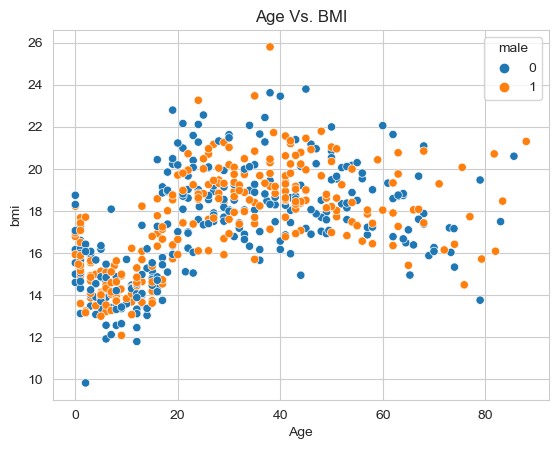

In [54]:
sns.scatterplot(x='Age', y='bmi', hue='male', data = df)
plt.title("Age Vs. BMI");